In [1]:
import os
import shutil

# location 
image_folder = '/local/data1/honzh073/centralized_learning/data/8bit_dataset_patient/AFF'

for filename in os.listdir(image_folder):
    if filename.endswith('.png'):
        # extract ID
        patient_id = filename.split('_')[1]  # using _ split patient images
        # create file based on patient ID
        patient_folder = os.path.join(image_folder, patient_id)
        os.makedirs(patient_folder, exist_ok=True)
        # move images to patient file
        src_path = os.path.join(image_folder, filename)
        dest_path = os.path.join(patient_folder, filename)
        shutil.move(src_path, dest_path)


In [2]:
import os
import shutil

# location 
image_folder = '/local/data1/honzh073/centralized_learning/data/8bit_dataset_patient/NFF'

for filename in os.listdir(image_folder):
    if filename.endswith('.png'):
        # extract ID
        patient_id = filename.split('_')[1]  # using _ split patient images
        # create file based on patient ID
        patient_folder = os.path.join(image_folder, patient_id)
        os.makedirs(patient_folder, exist_ok=True)
        # move images to patient file
        src_path = os.path.join(image_folder, filename)
        dest_path = os.path.join(patient_folder, filename)
        shutil.move(src_path, dest_path)


In [4]:
import torch
from torchvision.datasets import ImageFolder
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, random_split

# Define transformations (adjust as needed)
transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.RandomRotation(30),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2),
    transforms.RandomAffine(degrees=0, translate=(0.1, 0.1)),
    transforms.RandomPerspective(),
    transforms.RandomResizedCrop(224, scale=(0.8, 1.0)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Load the dataset
dataset = ImageFolder(root='/local/data1/honzh073/centralized_learning/data/8bit_dataset_patient', transform=transform)

# Split the dataset
total_size = len(dataset)
train_size = int(0.8 * total_size)
val_size = int(0.1 * total_size)
test_size = total_size - train_size - val_size

train_dataset, val_dataset, test_dataset = random_split(
    dataset, [train_size, val_size, test_size], generator=torch.Generator().manual_seed(42)
)

# Create data loaders for training, validation, and testing
batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, pin_memory=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, pin_memory=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, pin_memory=True)


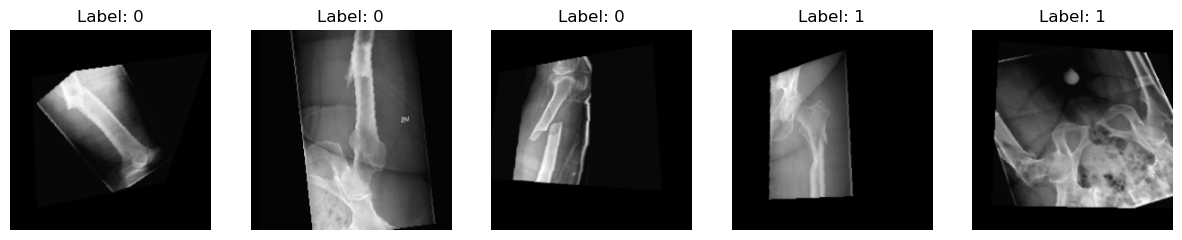

In [7]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader, random_split
import random
import matplotlib.pyplot as plt
import numpy as np
from torch import optim
from torch.optim import lr_scheduler
import torchvision.models as models

# ---------------------------------------------------------------------------------
# Get some random indices from the training dataset
random_indices = np.random.choice(len(val_dataset), 5, replace=False)

# Plot images (transformed)
plt.figure(figsize=(15, 5))
for i, idx in enumerate(random_indices):
    image, label = train_dataset[idx]
    plt.subplot(1, 5, i + 1)
    plt.title(f"Label: {label}")
    # plt.imshow(image[0])  # 3-channel (RGB)
    plt.imshow(image[0], cmap='gray')  #single-channel (grayscale)
    plt.axis('off')
plt.show()

In [8]:
# ---------------------------------------------------------------------------------
# aff and nff numbers in training dataset
train_aff_count = sum(1 for _, label in train_dataset if label == 0)  # 0 AFF
train_nff_count = sum(1 for _, label in train_dataset if label == 1)  # 1 NFF

# aff and nff numbers in test dataset
valid_aff_count = sum(1 for _, label in val_dataset if label == 0)
valid_nff_count = sum(1 for _, label in val_dataset if label == 1)

# aff and nff numbers in test dataset
test_aff_count = sum(1 for _, label in test_dataset if label == 0)
test_nff_count = sum(1 for _, label in test_dataset if label == 1)

print(f"train aff number: {train_aff_count}")
print(f"train nff number: {train_nff_count}")
print(f"validation aff number: {valid_aff_count}")
print(f"validation nff number: {valid_nff_count}")
print(f"test aff number: {test_aff_count}")
print(f"test nff number: {test_nff_count}")

# ---------------------------------------------------------------------------------
# Calculate class weights
n_aff_train = train_aff_count
n_nff_train = train_nff_count

class_weight_aff = 1 / (2 * (n_aff_train / (n_aff_train + n_nff_train)))
class_weight_nff = 1 / (2 * (n_nff_train / (n_aff_train + n_nff_train)))

print(f"Class Weight for AFF (0): {class_weight_aff:.4f}")
print(f"Class Weight for NFF (1): {class_weight_nff:.4f}")

train aff number: 691
train nff number: 2782
validation aff number: 101
validation nff number: 333
test aff number: 76
test nff number: 359
Class Weight for AFF (0): 2.5130
Class Weight for NFF (1): 0.6242
